In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import from your existing logic
from income_predict.data import fetch_census_data

# Import your new custom modules
from income_predict import preprocessing, plotting

In [24]:
# Load the dataframe from the CSV file
df_raw = pd.read_csv('data/census_income.csv')

# Display the first few rows
print(df_raw.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [25]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
# Check for missing values
missing_summary = preprocessing.get_missing_summary(df_raw)
display(missing_summary)

# Check for data quality of target variable
df_raw['income'].value_counts(dropna=False)

# Check for data quality of independent variables
columns_to_analyze = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
]

print("--- Value Counts for Demographic Columns ---")
for col in columns_to_analyze:
    print(f"\n**Value Counts for: {col}**")
    print(df_raw[col].value_counts(dropna=False))


,Missing Values,Percent
occupation,966,1.977806
workclass,963,1.971664
native-country,274,0.560993


--- Value Counts for Demographic Columns ---

**Value Counts for: age**
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

**Value Counts for: workclass**
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
NaN                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

**Value Counts for: fnlwgt**
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

**Value Counts for: education**
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1

In [27]:
# Clean column names (e.g. 'capital-gain' -> 'capital_gain')
df_clean = preprocessing.clean_column_names(df_raw)
df_clean.columns.tolist()



['age',
 'work_class',
 'final_weight',
 'education',
 'education_years',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

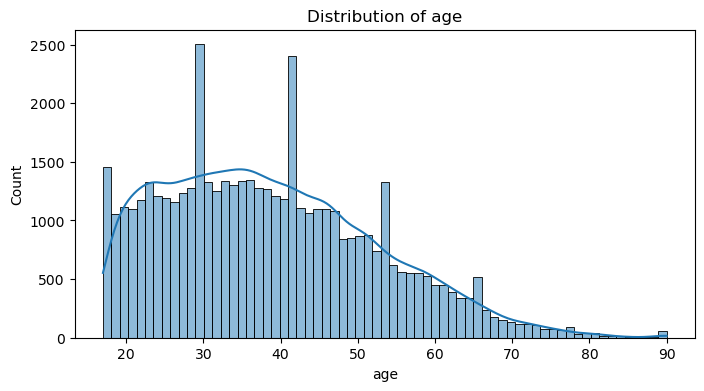

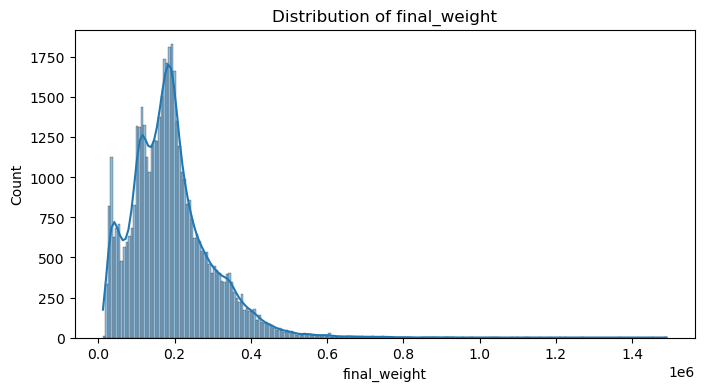

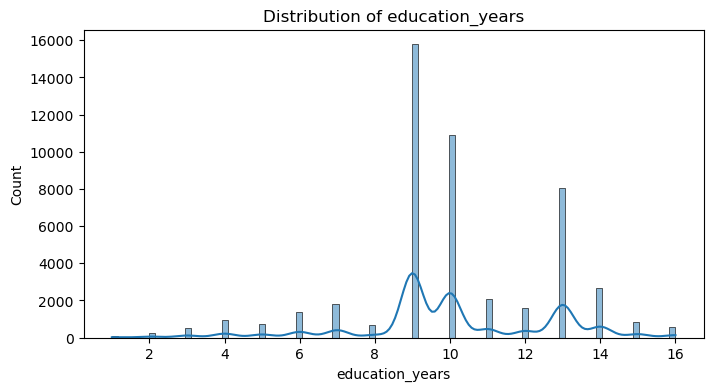

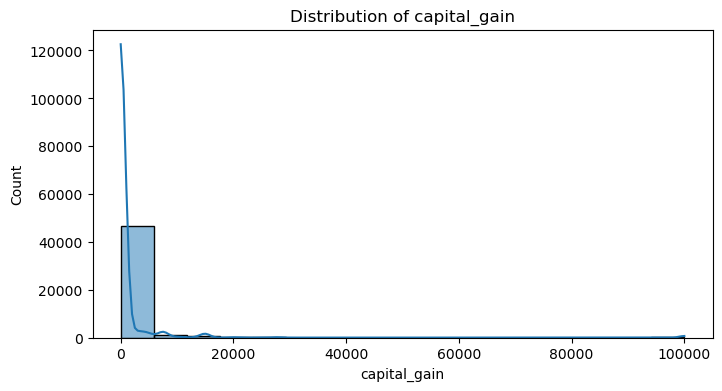

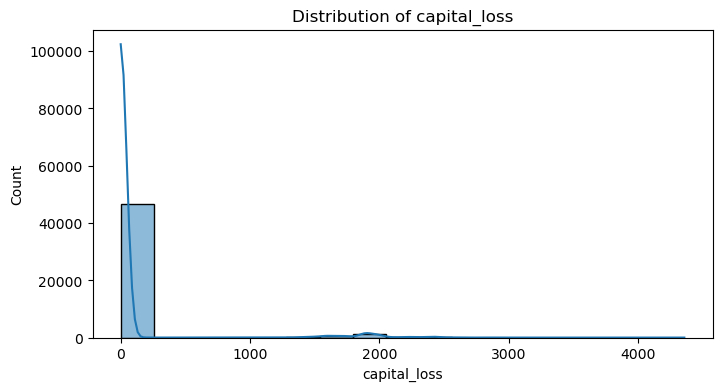

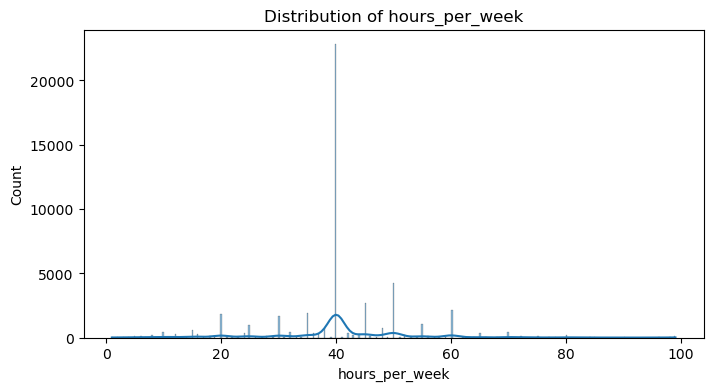

In [28]:
# Identify numeric columns for plotting
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot distributions
plotting.plot_numeric_distributions(df_clean, numeric_cols[:])

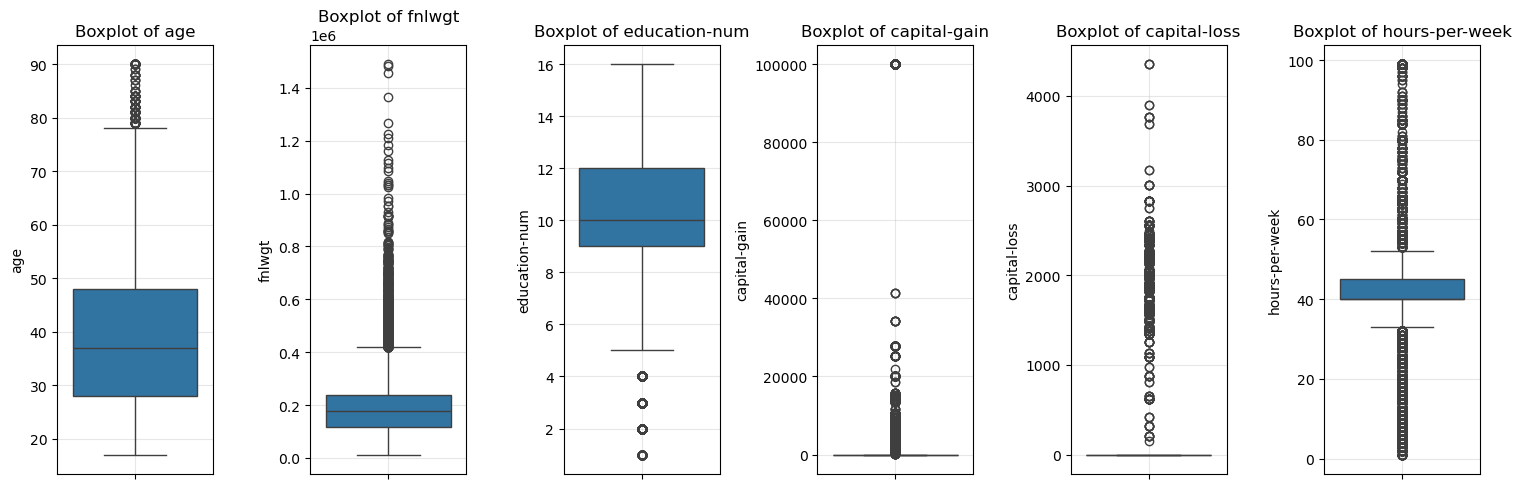

In [29]:
 numeric_cols = df_raw.select_dtypes(include=[np.number]).columns
    
if len(numeric_cols) == 0:
    print("No numeric columns found to visualize.")

n_cols = len(numeric_cols)
    
# Create figure
figsize = (15, 5)
plt.figure(figsize=figsize)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, n_cols, i)
    sns.boxplot(y=df_raw[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()